# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [217]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [218]:
t = [1, 2, 2, 3, 5]
t

[1, 2, 2, 3, 5]

You can use a Python dictionary:

In [219]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    print(x, hist[x])
hist

1 1
2 1
2 2
3 1
5 1


{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [220]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [221]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [222]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [223]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [224]:
hist[4]

0

The `Values` method returns the values:

In [225]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [226]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [227]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

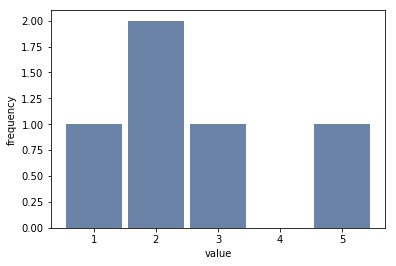

In [228]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [229]:
preg = nsfg.ReadFemPreg()
live = preg.loc[(preg.outcome >= 1) & (preg.birthwgt_lb.notnull())]
#df.loc[(df.a != 1) & (df.b < 5)]

In [230]:
live[['outcome', 'birthwgt_lb']]

,outcome,birthwgt_lb
0,1,8.0
1,1,7.0
2,1,9.0
3,1,7.0
4,1,6.0
5,1,8.0
6,1,9.0
7,1,8.0
8,1,7.0
9,1,6.0


Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

In [231]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
hist

Hist({7.0: 3049, 6.0: 2223, 8.0: 1889, 5.0: 697, 9.0: 623, 4.0: 229, 10.0: 132, 3.0: 98, 2.0: 53, 1.0: 40, 11.0: 26, 12.0: 10, 0.0: 8, 13.0: 3, 14.0: 3, 15.0: 1})

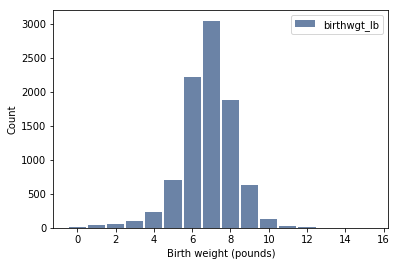

In [232]:
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [233]:
ages_notFloored = live.agepreg
ages_notFloored

0        33.16
1        39.25
2        14.33
3        17.83
4        18.33
5        27.00
6        28.83
7        30.16
8        28.08
9        32.33
10       25.75
11       23.00
12       24.58
15       28.33
16       30.33
17       18.91
19       27.91
20       30.58
21       18.91
23       22.25
24       25.75
25       29.41
26       32.66
27       18.83
28       20.83
29       21.66
31       33.08
32       26.25
33       27.91
34       37.25
         ...  
13548    23.91
13551    25.25
13552    26.25
13553    27.25
13554    28.91
13555    17.16
13556    21.16
13557    26.33
13559    23.58
13560    26.91
13561    28.16
13562    18.25
13563    21.08
13564    23.33
13565    20.25
13566    32.66
13569    18.00
13570    24.41
13571    27.83
13572    33.16
13573    22.25
13574    24.41
13576    31.66
13578    24.00
13579    25.91
13581    30.66
13584    26.91
13588    17.91
13591    21.58
13592    21.58
Name: agepreg, Length: 9084, dtype: float64

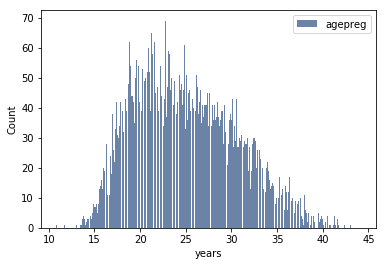

In [234]:
hist_noFloor = thinkstats2.Hist(ages_notFloored, label='agepreg')
thinkplot.Hist(hist_noFloor)
thinkplot.Config(xlabel='years', ylabel='Count')

In [235]:
ages = np.floor(live.agepreg)
ages

0        33.0
1        39.0
2        14.0
3        17.0
4        18.0
5        27.0
6        28.0
7        30.0
8        28.0
9        32.0
10       25.0
11       23.0
12       24.0
15       28.0
16       30.0
17       18.0
19       27.0
20       30.0
21       18.0
23       22.0
24       25.0
25       29.0
26       32.0
27       18.0
28       20.0
29       21.0
31       33.0
32       26.0
33       27.0
34       37.0
         ... 
13548    23.0
13551    25.0
13552    26.0
13553    27.0
13554    28.0
13555    17.0
13556    21.0
13557    26.0
13559    23.0
13560    26.0
13561    28.0
13562    18.0
13563    21.0
13564    23.0
13565    20.0
13566    32.0
13569    18.0
13570    24.0
13571    27.0
13572    33.0
13573    22.0
13574    24.0
13576    31.0
13578    24.0
13579    25.0
13581    30.0
13584    26.0
13588    17.0
13591    21.0
13592    21.0
Name: agepreg, Length: 9084, dtype: float64

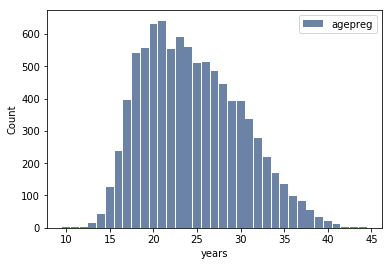

In [236]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

In [237]:
# Solution goes here
prglngth_list = preg.loc[(preg.outcome >= 1) & (preg.prglngth.notnull())]
prglngth_list[['outcome', 'prglngth']]

,outcome,prglngth
0,1,39
1,1,39
2,1,39
3,1,39
4,1,39
5,1,38
6,1,40
7,1,42
8,1,39
9,1,35


In [238]:
prglngth = prglngth_list.prglngth
prglngth

0        39
1        39
2        39
3        39
4        39
5        38
6        40
7        42
8        39
9        35
10       39
11       39
12       37
13        9
14        3
15       33
16       33
17       39
18        5
19       41
20       39
21       39
22        8
23       39
24       39
25       39
26       39
27       42
28       37
29       40
         ..
13563    40
13564    39
13565    41
13566    40
13567     9
13568     9
13569    38
13570    39
13571    39
13572    39
13573    39
13574    39
13575     3
13576    39
13577    35
13578    39
13579    39
13580    11
13581    39
13582     3
13583    17
13584    34
13585     9
13586     9
13587     9
13588    39
13589     6
13590     5
13591    39
13592    39
Name: prglngth, Length: 13593, dtype: int64

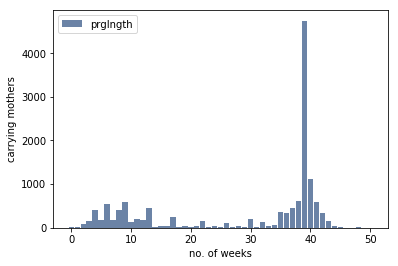

In [239]:
prglngth_hist = thinkstats2.Hist(prglngth, label='prglngth')
thinkplot.Hist(prglngth_hist)
thinkplot.Config(xlabel='no. of weeks', ylabel='carrying mothers')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [240]:
for weeks, freq in prglngth_hist.Smallest(10):
    print(weeks, freq)

0 15
1 9
2 78
3 151
4 412
5 181
6 543
7 175
8 409
9 594


Use `Largest` to display the longest pregnancy lengths.

In [241]:
# Solution goes here
for weeks, freq in prglngth_hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 591
40 1120


From live births, we can selection first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [242]:
firsts = live[live.birthord == 1]
first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
first_hist

Hist({39: 2096, 40: 534, 41: 360, 38: 268, 37: 207, 42: 205, 36: 169, 35: 155, 43: 87, 30: 73, 32: 55, 34: 29, 33: 28, 44: 23, 28: 23, 26: 16, 31: 15, 29: 9, 24: 7, 45: 6, 22: 3, 48: 3, 20: 1, 47: 1, 17: 1, 21: 1, 25: 1, 46: 1, 23: 1, 27: 1, 0: 1})

In [243]:
others = live[(live.birthord != 1) & live.birthord.notnull()]
other_hist = thinkstats2.Hist(others.prglngth, label='other')
other_hist

Hist({39: 2558, 40: 577, 38: 334, 37: 246, 41: 227, 35: 152, 36: 148, 42: 123, 30: 63, 43: 61, 32: 60, 34: 31, 44: 23, 33: 21, 26: 18, 29: 12, 31: 12, 28: 8, 24: 6, 22: 4, 45: 4, 48: 4, 27: 2, 50: 2, 25: 2, 21: 1, 9: 1, 17: 1, 19: 1, 18: 1, 4: 1})

We can use `width` and `align` to plot two histograms side-by-side.

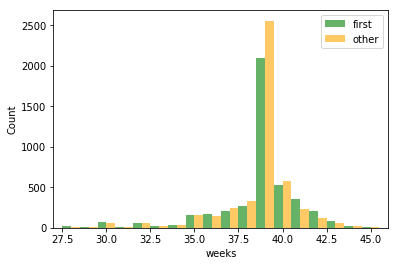

In [244]:
width = 0.5
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width, color = "green", ec="green")
thinkplot.Hist(other_hist, align='left', width=width, color = "orange")
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [245]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean, var and standard deviation:

In [246]:
mean, var, std

(38.568472038749448, 7.2251910593303794, 2.6879715510641811)

As an exercise, confirm that `std` is the square root of `var`:

In [247]:
# Solution goes here
np.square(std) == var

True

Here's are the mean pregnancy lengths for first babies and others:

In [248]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.607077625570774, 38.532525510204081)

And here's the difference (in weeks):

In [249]:
firsts.prglngth.mean() - others.prglngth.mean()

0.074552115366692817

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [258]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [259]:
# Solution goes here
cohenPregLength = CohenEffectSize(firsts.prglngth, others.prglngth)
cohenPregLength

0.027736584278770467

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [260]:
# Solution goes here
first_wgt_hist = thinkstats2.Hist(np.floor(firsts.totalwgt_lb), label='first')
first_wgt_hist

Hist({7.0: 1504, 6.0: 1121, 8.0: 816, 5.0: 355, 9.0: 266, 4.0: 117, 10.0: 54, 3.0: 48, 2.0: 27, 1.0: 25, 11.0: 14, 12.0: 8, 0.0: 5, 14.0: 1, 15.0: 1, 13.0: 1})

In [261]:
others_wgt_hist = thinkstats2.Hist(np.floor(others.totalwgt_lb), label='others')
others_wgt_hist

Hist({7.0: 1527, 6.0: 1093, 8.0: 1065, 9.0: 354, 5.0: 337, 4.0: 110, 10.0: 78, 3.0: 50, 2.0: 26, 1.0: 15, 11.0: 12, 0.0: 2, 13.0: 2, 14.0: 2, 12.0: 2})

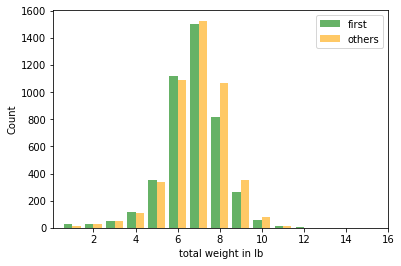

In [262]:
width = 0.4
thinkplot.PrePlot(2)
thinkplot.Hist(first_wgt_hist, align='right', width=width, color = "green", ec="green")
thinkplot.Hist(others_wgt_hist, align='left', width=width, color = "orange")
thinkplot.Config(xlabel='total weight in lb', ylabel='Count', xlim=[0.1, 16.0])

In [263]:
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.3258556149732623)

In [264]:
# Solution goes here
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)


-0.08867331631726609

For the next few exercises, we'll load the respondent file:

In [265]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [266]:
# Solution goes here
richopoor = resp.totincr
richopoor

0        9
1       10
2        5
3       13
4        6
5        7
6        6
7       12
8        6
9       12
10       9
11      13
12       7
13       8
14       6
15       9
16       5
17       2
18       9
19       4
20      12
21      12
22       8
23      13
24      10
25       6
26      11
27       2
28      11
29       9
        ..
7613    13
7614     7
7615    14
7616     4
7617    12
7618     8
7619    14
7620     8
7621    11
7622    14
7623    14
7624    12
7625    14
7626     2
7627     3
7628    14
7629     4
7630     5
7631     1
7632     6
7633     9
7634     5
7635     8
7636     3
7637     8
7638    14
7639    14
7640    10
7641    13
7642    11
Name: totincr, Length: 7643, dtype: int64

In [267]:
wealth_hist = thinkstats2.Hist(richopoor, label='salary')
wealth_hist

Hist({14: 1160, 12: 658, 11: 647, 13: 623, 9: 607, 8: 606, 7: 583, 6: 559, 10: 468, 5: 445, 4: 421, 2: 301, 1: 299, 3: 266})

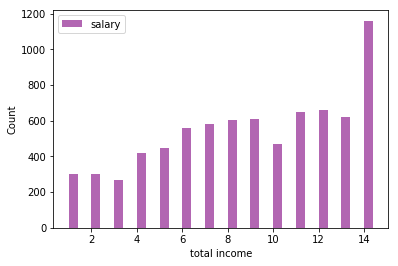

In [268]:
width = 0.4
thinkplot.Hist(wealth_hist, align='left', width=width, color = "purple")
thinkplot.Config(xlabel='total income', ylabel='Count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

In [269]:
# Solution goes here
interviewage = resp.age_r
interviewage

0       27
1       42
2       43
3       15
4       20
5       42
6       17
7       22
8       38
9       21
10      43
11      26
12      23
13      34
14      28
15      28
16      23
17      33
18      16
19      24
20      22
21      32
22      41
23      37
24      38
25      29
26      21
27      37
28      39
29      26
        ..
7613    18
7614    24
7615    15
7616    30
7617    24
7618    34
7619    34
7620    26
7621    22
7622    19
7623    19
7624    37
7625    20
7626    23
7627    23
7628    17
7629    36
7630    44
7631    32
7632    40
7633    35
7634    35
7635    30
7636    41
7637    35
7638    34
7639    17
7640    29
7641    16
7642    28
Name: age_r, Length: 7643, dtype: int64

In [270]:
interviewage_hist = thinkstats2.Hist(interviewage, label='age at interview')
interviewage_hist

Hist({30: 292, 22: 287, 23: 282, 31: 278, 32: 273, 37: 271, 24: 269, 21: 267, 25: 267, 36: 266, 35: 262, 29: 262, 26: 260, 20: 258, 33: 257, 38: 256, 40: 256, 34: 255, 27: 255, 43: 253, 28: 252, 41: 250, 19: 241, 44: 235, 18: 235, 17: 234, 16: 223, 15: 217, 39: 215, 42: 215})

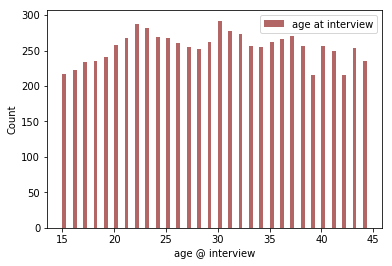

In [271]:
width = 0.37
thinkplot.Hist(interviewage_hist, align='left', width=width, color = "maroon")
thinkplot.Config(xlabel='age @ interview', ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

In [272]:
# Solution goes here
numfmhh_hist = thinkstats2.Hist(resp.numfmhh, label='family size')
numfmhh_hist

Hist({2: 1826, 3: 1740, 1: 1716, 0: 942, 4: 906, 5: 313, 6: 118, 7: 78, 8: 4})

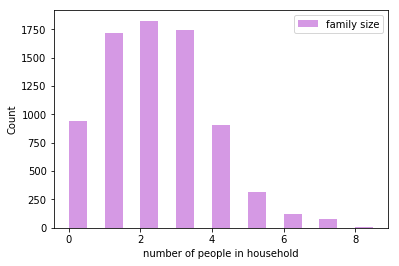

In [273]:
width = 0.5
thinkplot.Hist(numfmhh_hist, align='left', width=width, color = "mediumorchid")
thinkplot.Config(xlabel='number of people in household', ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

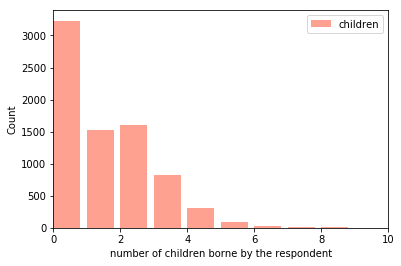

In [274]:
# Solution goes here
width = 0.8
parity_hist = thinkstats2.Hist(resp.parity, label='children')
thinkplot.Hist(parity_hist, align='left', width=width, color = "tomato")
thinkplot.Config(xlabel='number of children borne by the respondent', ylabel='Count', xlim=[0, 10.0])

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [275]:
# Solution goes here
for kids, freq in parity_hist.Largest(10):
    print(kids, freq)

22 1
16 1
10 3
9 2
8 8
7 15
6 29
5 95
4 309
3 828


In [276]:
for totincr, freq in wealth_hist.Largest(10):
    print(totincr, freq)

14 1160
13 623
12 658
11 647
10 468
9 607
8 606
7 583
6 559
5 445


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

Hist({0: 515, 2: 267, 1: 229, 3: 123, 4: 19, 5: 5, 8: 1, 7: 1})

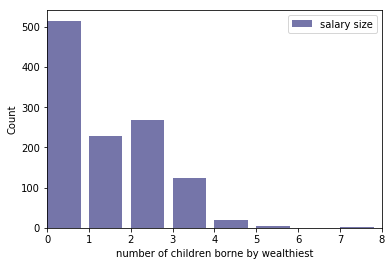

In [277]:
# Solution goes here
richopoor_kids = resp[['totincr', 'parity']]
wealthy_resp = richopoor_kids[richopoor_kids.totincr == 14]
poor_resp = richopoor_kids[richopoor_kids.totincr < 14]
richopoor_kids_hist = thinkstats2.Hist(wealthy_resp.parity, label='salary size')

width = 0.8
thinkplot.Hist(richopoor_kids_hist, align='left', width=width, color = "midnightblue")
thinkplot.Config(xlabel='number of children borne by wealthiest', ylabel='Count', xlim=[0, 8.0])
richopoor_kids_hist

Find the largest parities for high income respondents.

In [278]:
# Solution goes here
for totincr, freq in richopoor_kids_hist.Largest(5):
    print(totincr, freq)

8 1
7 1
5 5
4 19
3 123


Compare the mean <tt>parity</tt> for high income respondents and others.

In [279]:
# Solution goes here
wealthy_resp.parity.mean(), poor_resp.parity.mean()

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [280]:
# Solution goes here
cohenParityWealth = CohenEffectSize(wealthy_resp.parity, poor_resp.parity)
cohenParityWealth

-0.12511855314660367

In [281]:
cohenPregLength, cohenParityWealth

(0.027736584278770467, -0.12511855314660367)